In [57]:
setwd("/Users/stevennguyen/Projects/scrnaseq-analysis")

In [58]:
# load libraries and seurat obj
library(Seurat)
library(ggplot2)
library(dplyr)

idc <- readRDS("/Users/stevennguyen/Projects/scrnaseq-analysis/data/processed/idc_clustered.rds")
idc

An object of class Seurat 
22914 features across 783 samples within 1 assay 
Active assay: RNA (22914 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap

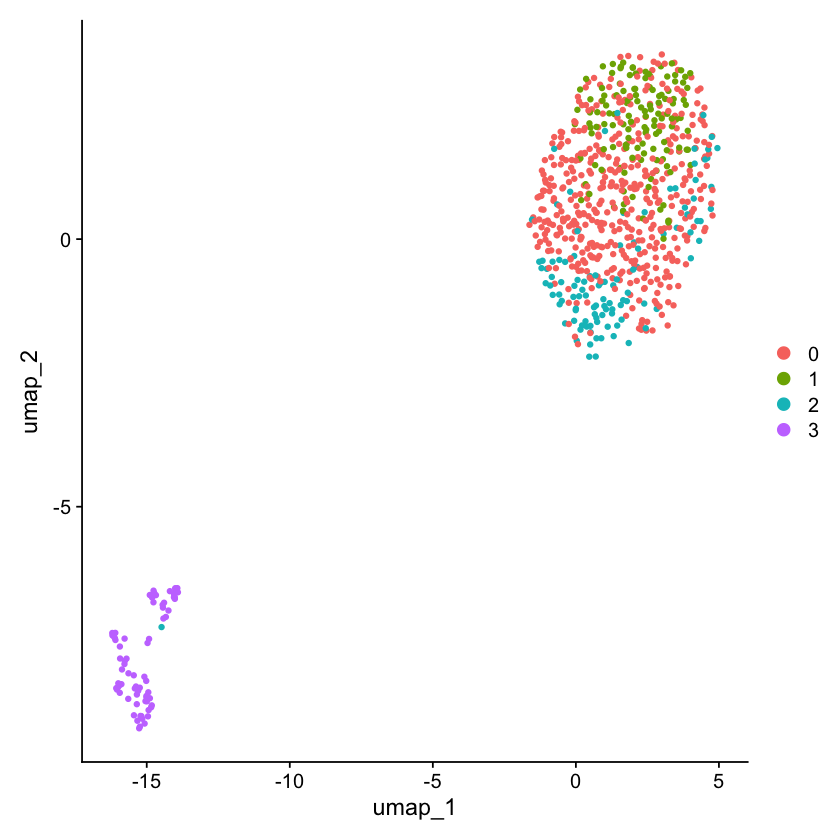

In [59]:
# visualize clusters again - clusters 0,1,2 are less variable vs. cluster 3
DimPlot(idc, reduction = "umap")

## Finding cluster markers for cell type annotation


In [60]:
# find markers for every cluster compared to all remaining cells, report only the positive
idc.markers <- FindAllMarkers(idc, only.pos = TRUE)
idc.markers %>%
    group_by(cluster) %>%
       filter(avg_log2FC > 1)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3



p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
4.384285e-05,1.607662,0.017,0.078,1,0,GGA2
7.346735e-05,1.051448,0.037,0.113,1,0,YY1
4.478732e-04,1.335585,0.022,0.075,1,0,PHF20L1
4.509515e-04,1.338911,0.022,0.075,1,0,TOB2
1.017082e-03,1.039153,0.052,0.122,1,0,JMJD6
1.029931e-03,1.422683,0.017,0.063,1,0,ZNF394
1.029931e-03,1.095523,0.017,0.063,1,0,GTPBP4
1.043000e-03,1.600555,0.026,0.078,1,0,TMEM248
1.146622e-03,1.087765,0.039,0.100,1,0,RNMT


[1] "CARTPT" "NTS"    "COX6C"  "CPB1"   "PIP"

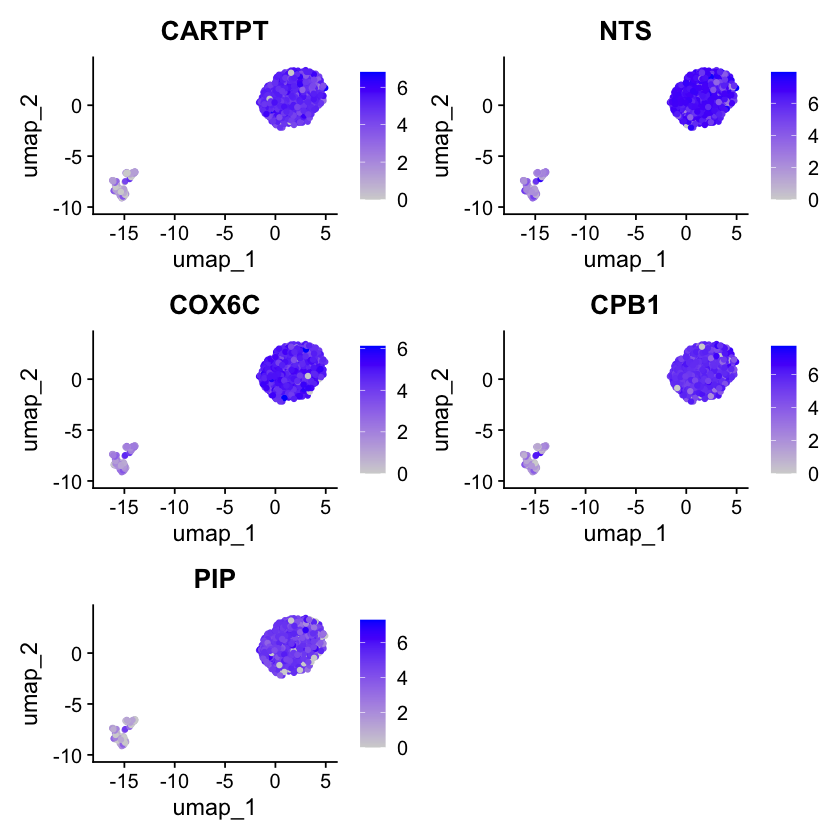

In [6]:
# visualize top markers in each cluster 
top5_cluster0 <- head(subset(idc.markers, cluster == 0)$gene, 5)
FeaturePlot(idc, features = top5_cluster0)
VlnPlot(idc, features = top5_cluster0)
top5_cluster0

# CARTPT - potential biomarker and oncogene for IDC; contributes to increased cancer cell survival and resistance to tamoxifen 
# NTS - involved in cancer cell proliferation and migration (promotes epithelial - mesenchymal transition) 
# COX6C - involved in cellular respiration, can be upregulated in proliferating cells (like cancer cells) 

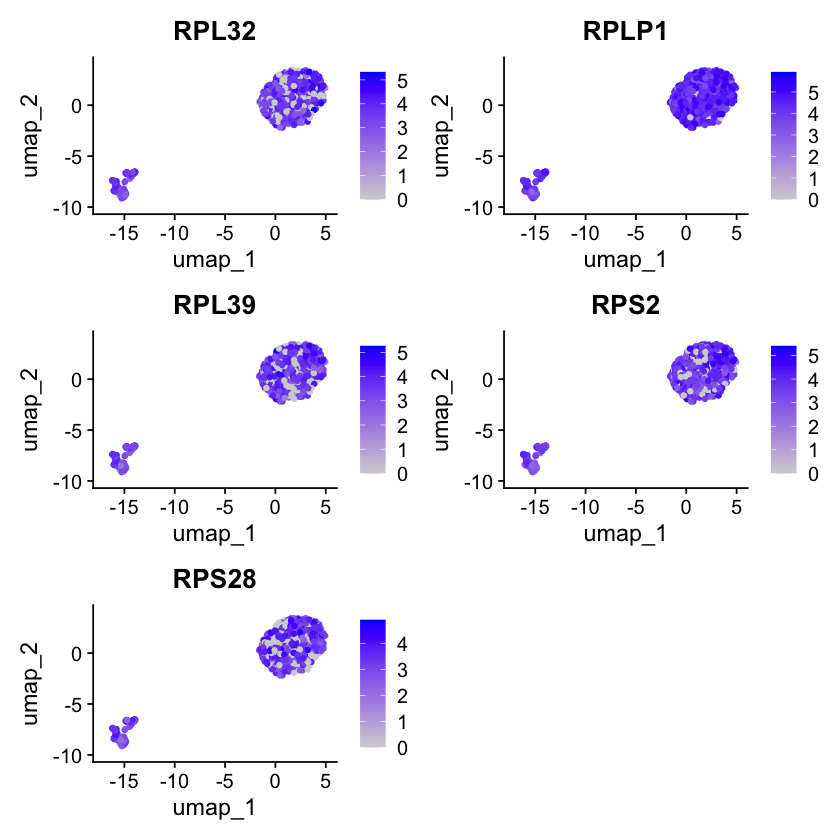

[1] "RPL32" "RPLP1" "RPL39" "RPS2"  "RPS28"

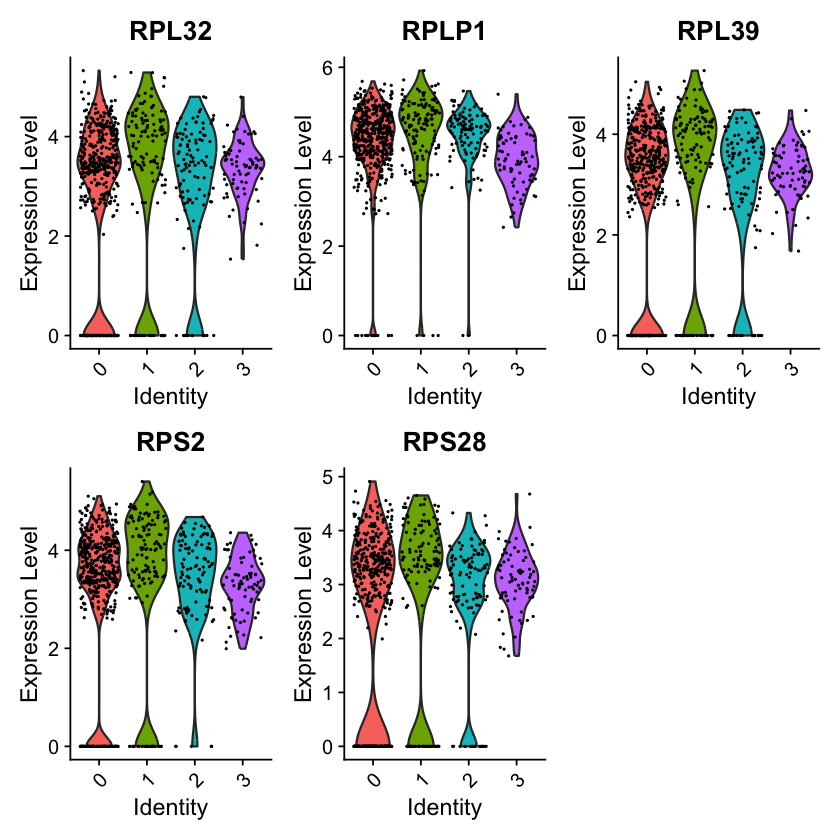

In [61]:
top5_cluster1 <- head(subset(idc.markers, cluster == 1)$gene, 5)
FeaturePlot(idc, features = top5_cluster1)
VlnPlot(idc, features = top5_cluster1)
top5_cluster1

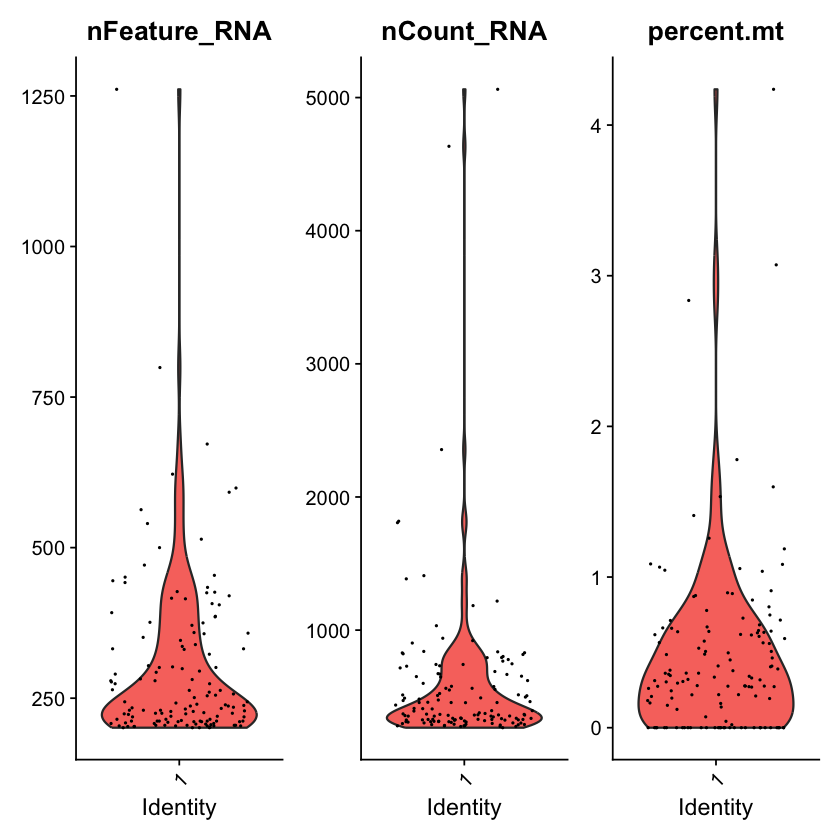

In [10]:
# check qc metrics of cluster 1 b/c high ribosomal genes 
VlnPlot(idc, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), 
        idents = 1)  # Just show cluster 1

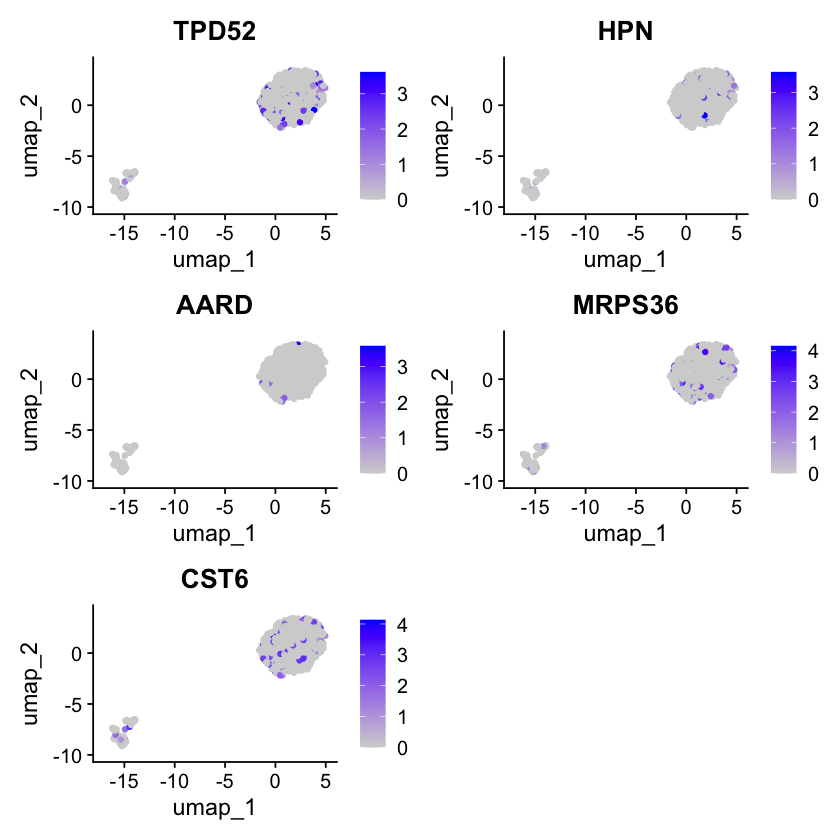

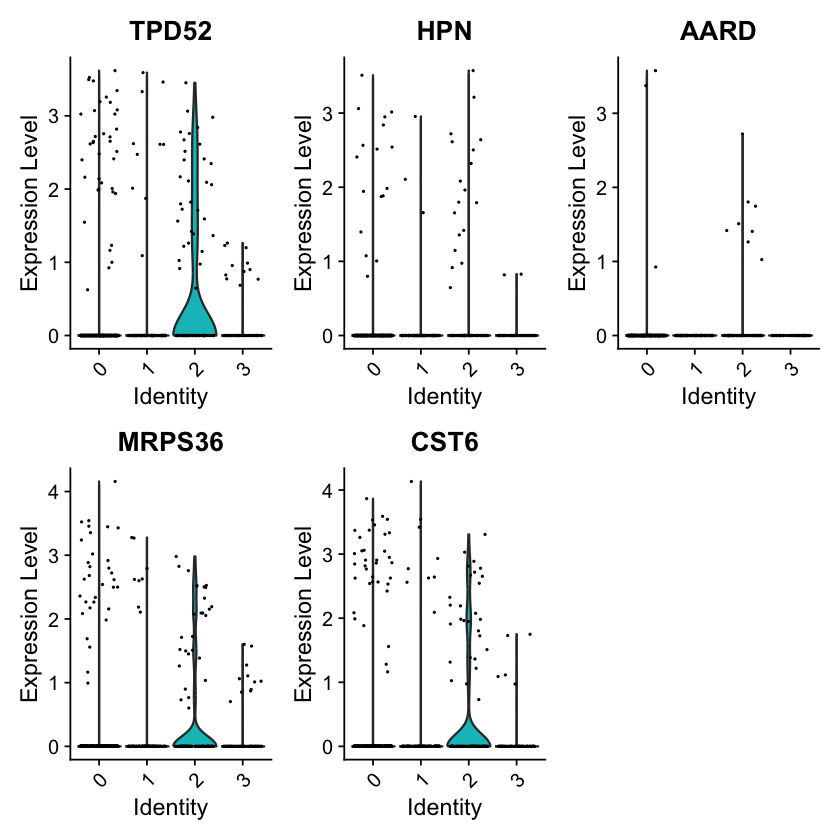

In [62]:
top5_cluster2 <- head(subset(idc.markers, cluster == 2)$gene, 5)
FeaturePlot(idc, features = top5_cluster2)
VlnPlot(idc, features = top5_cluster2)

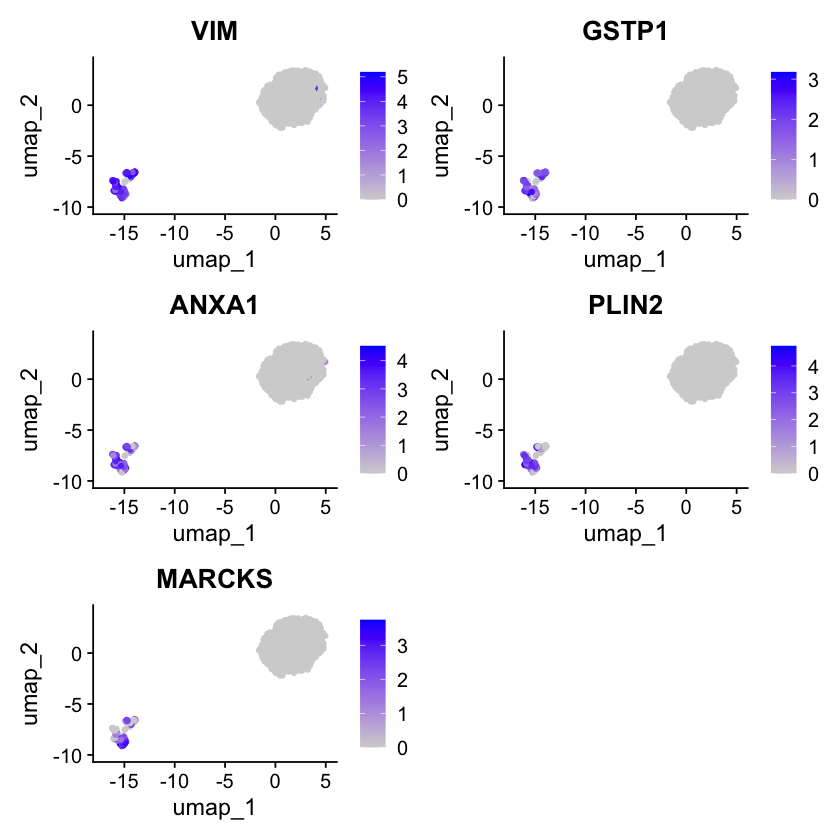

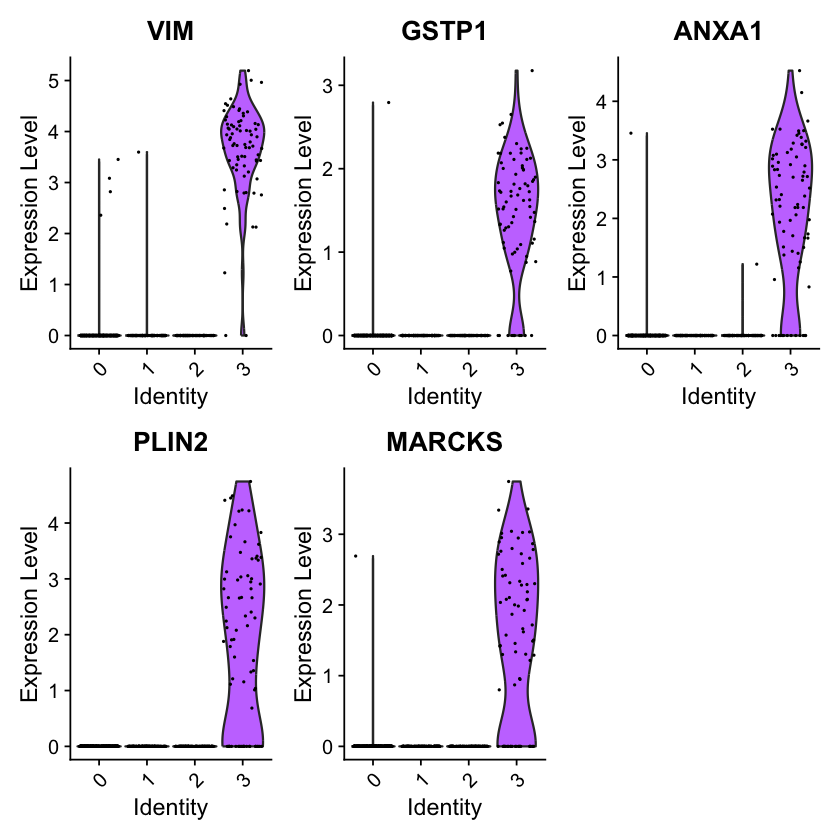

In [63]:
top5_cluster3 <- head(subset(idc.markers, cluster == 3)$gene, 5)
FeaturePlot(idc, features = top5_cluster3)
VlnPlot(idc, features = top5_cluster3)

## Further analysis and identification of cluster 3

Warning message:
“All cells have the same value (0) of “CDH2””
Warning message in SingleExIPlot(type = type, data = data[, x, drop = FALSE], idents = idents, :
“All cells have the same value of CDH2.”


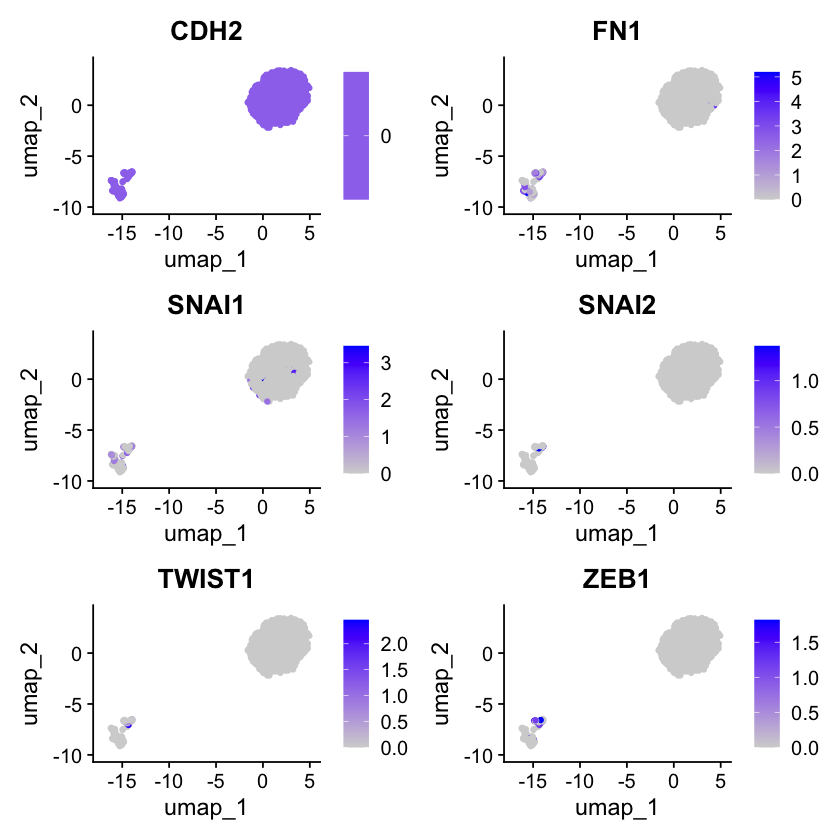

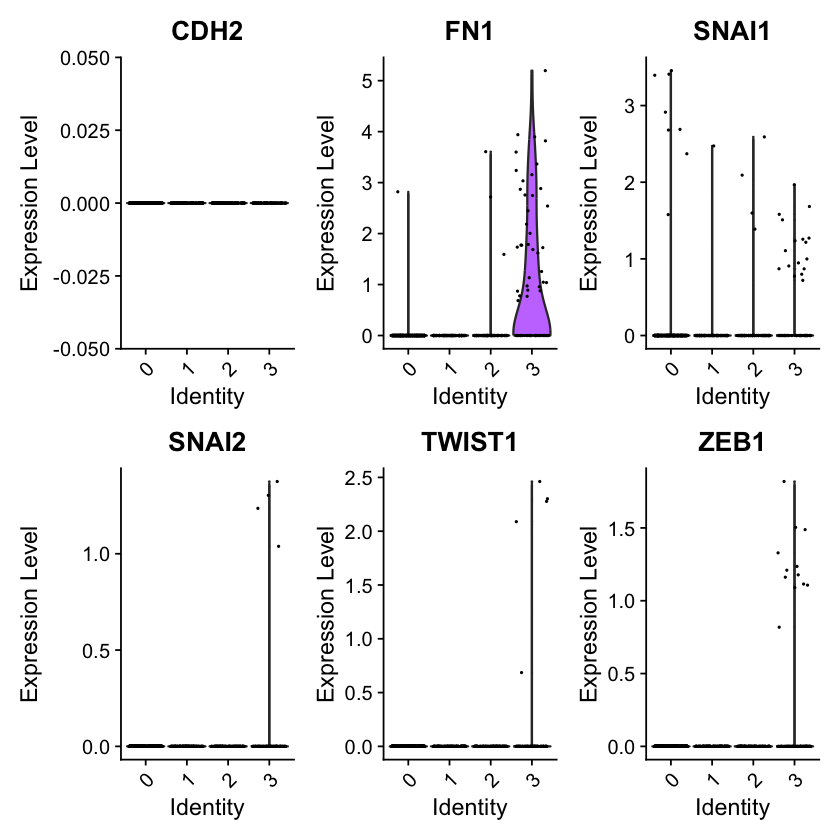

In [15]:
# VIM is a strong EMT marker, suggesting cluster 3 contains invasive mesenchymal like cancer cells 
# GSTP1 linked to EMT in cancer b/c it contributes to aggressive state of cancer cells - invasive and drug resistant 
# ANXA1 correlated with EMT and cancer - involved in cell proliferation and invasiveness 
# PLIN2 regulates lipid droplets and promotes mesenchymal markers, while decreasing epithelial markers 
# MARCKS promotes cell migration 

# top markers of cluster 3 all point to progression of mesenchymal/invasive like phenotypes 

# check other EMT markers to identify if cluster 3 is also upregulated in these 
emt_markers <- c("CDH2", "FN1", "SNAI1", "SNAI2", "TWIST1", "ZEB1")
FeaturePlot(idc, features = emt_markers)
VlnPlot(idc, features = emt_markers)

# FN1 part of ECM and interacts with cytoskeleton 

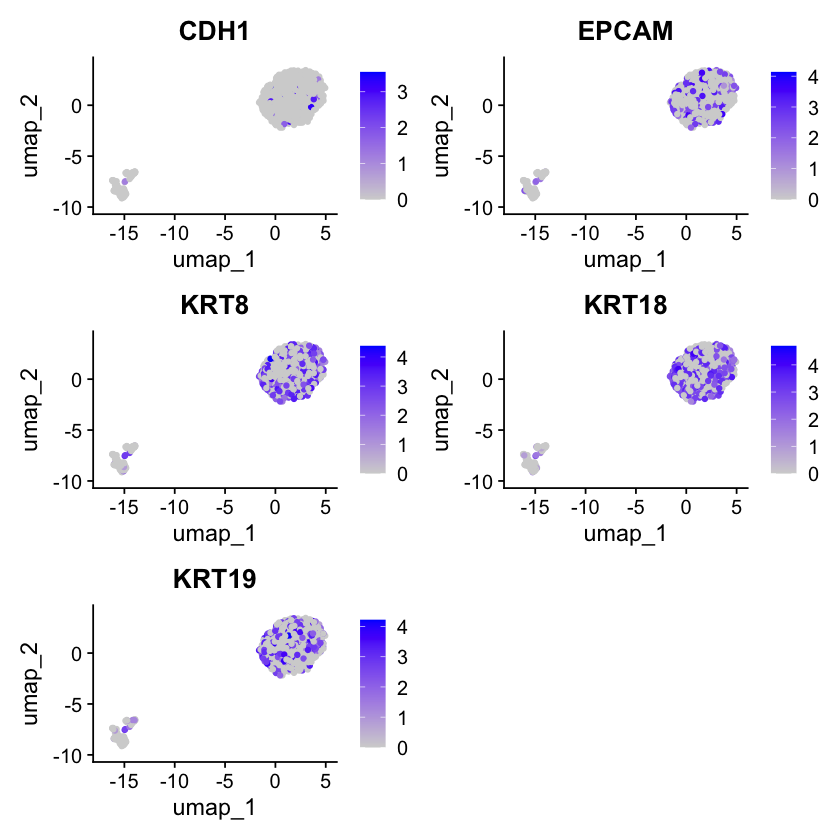

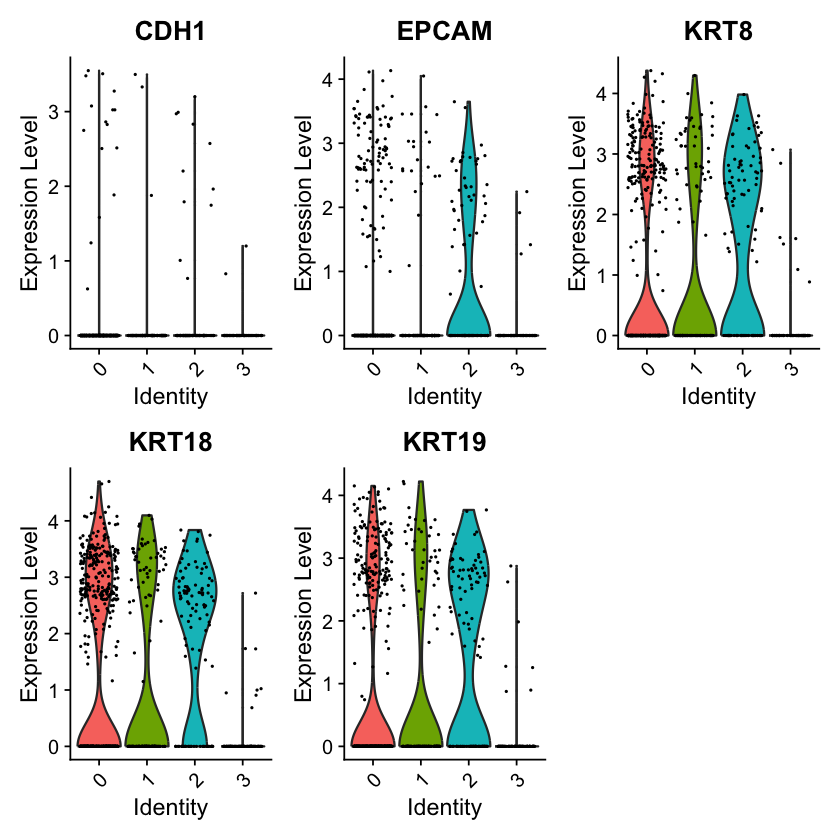

In [64]:
# Epithelial markers that should be lowly expressed in cluster 3 and highly expressed in 0, 1, and 2
epithelial_markers <- c("CDH1", "EPCAM", "KRT8", "KRT18", "KRT19")
FeaturePlot(idc, features = epithelial_markers)
VlnPlot(idc, features = epithelial_markers)

## Cluster 3 - mesenchymal-like cells (high expression of VIM, an EMT marker) 

## Is there any variation between epithelial cell cluster: Cluster 0, 1, and 2

In [17]:
# Compare epithelial clusters 0, 1, and 2
markers_0_vs_1 <- FindMarkers(idc, ident.1 = 0, ident.2 = 1)
markers_0_vs_2 <- FindMarkers(idc, ident.1 = 0, ident.2 = 2)
markers_1_vs_2 <- FindMarkers(idc, ident.1 = 1, ident.2 = 2)


In [71]:
# plot top markers between cluster 0 and 1 
markers_0_vs_1 <- markers_0_vs_1 %>%
    arrange(markers_0_vs_1$p_val_adj) %>% # sort starting at lowest adj p value 
        FeaturePlot(idc, features = head(rownames(markers_0_vs_1), n = 5)

ERROR: Error in parse(text = input): <text>:5:0: unexpected end of input
3:     arrange(markers_0_vs_1$p_val_adj) %>% # sort starting at lowest adj p value 
4:         FeaturePlot(idc, features = head(rownames(markers_0_vs_1), n = 5)
  ^


In [ ]:
# merge cluster 0 and 1?

In [35]:
library(dplyr)
    markers_0_vs_2 <- markers_0_vs_2 %>%
      arrange(markers_0_vs_2$p_val_adj)
markers_0_vs_2

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DNAJC21,1.760783e-10,-2.2039837,0.006,0.119,4.034659e-06
ATG101,9.767817e-10,-1.5267468,0.028,0.183,2.238198e-05
DCTN6,1.017442e-09,-2.1541027,0.026,0.174,2.331366e-05
TPD52,6.760311e-09,-1.0670652,0.082,0.294,1.549058e-04
PHF10,8.933764e-09,-4.2366582,0.002,0.083,2.047083e-04
TPI1,1.672932e-08,-0.7800547,0.188,0.477,3.833356e-04
SUMO1,1.710395e-08,-1.2279829,0.086,0.294,3.919199e-04
RAB1A,2.111354e-08,-1.5022662,0.039,0.193,4.837956e-04
GEM,3.666199e-08,-2.5747560,0.019,0.138,8.400728e-04


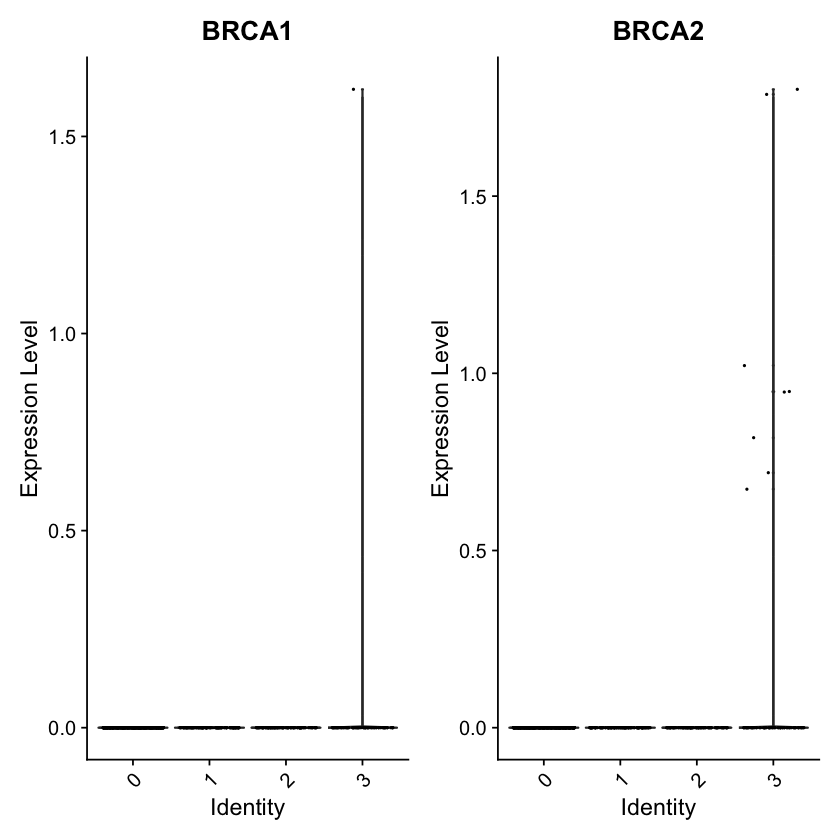

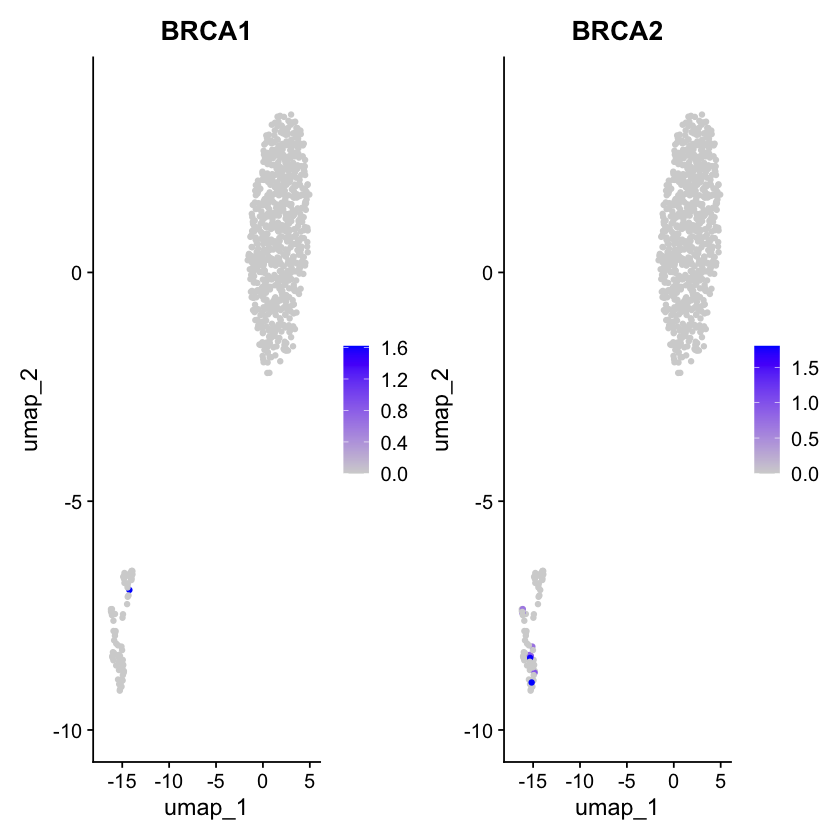

In [44]:
VlnPlot(idc,features = c("BRCA1","BRCA2"))
FeaturePlot(idc,features = c("BRCA1","BRCA2"))

In [45]:
library(dplyr)
    markers_1_vs_2 <- markers_1_vs_2 %>%
      arrange(markers_1_vs_2$p_val_adj)
markers_1_vs_2

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CEBPB,1.291177e-10,-1.3946424,0.119,0.541,2.958602e-06
EGR1,3.444479e-10,-1.6293833,0.082,0.459,7.892680e-06
CD81,6.221867e-10,-2.6886759,0.030,0.330,1.425679e-05
JUNB,8.132752e-10,-1.0240808,0.299,0.807,1.863539e-05
TSC22D1,5.904310e-09,-3.2929365,0.030,0.303,1.352913e-04
CEBPD,7.791734e-09,-1.0419094,0.149,0.532,1.785398e-04
PSMD4,1.098590e-08,-2.9684406,0.030,0.294,2.517310e-04
SLC9A3R1,1.760167e-08,-3.6758854,0.015,0.257,4.033248e-04
HSPA1B,1.860758e-08,-1.0148996,0.224,0.661,4.263740e-04


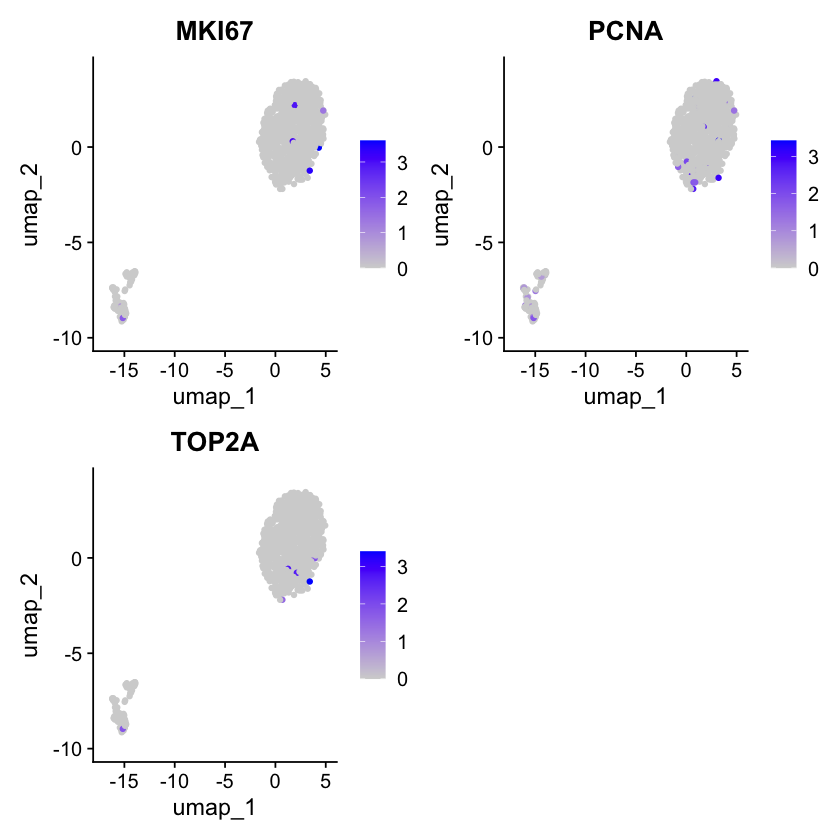

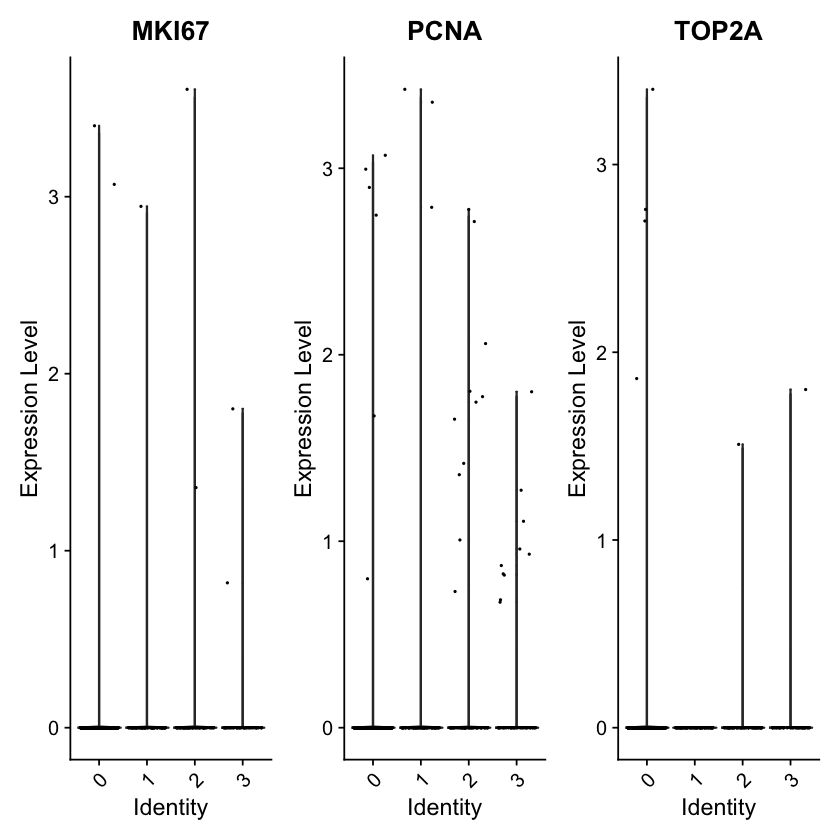

In [49]:
FeaturePlot(idc,features = c("MKI67", "PCNA", "TOP2A"))
VlnPlot(idc,features = c("MKI67", "PCNA", "TOP2A"))

In [51]:
idc.markers[idc.markers$cluster == 0,]

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
CARTPT,1.026329e-16,0.4726267,0.994,0.928,2.351731e-12,0,CARTPT
NTS,1.105549e-16,0.5753584,0.996,0.994,2.533256e-12,0,NTS
COX6C,1.649667e-15,0.5064076,0.994,0.978,3.780047e-11,0,COX6C
CPB1,3.504823e-15,0.5061715,0.998,0.953,8.030951e-11,0,CPB1
PIP,1.674185e-11,0.4893925,0.957,0.865,3.836227e-07,0,PIP
TFF3,8.192090e-10,0.6471110,0.683,0.495,1.877136e-05,0,TFF3
CHGB,9.859572e-10,0.5735798,0.722,0.580,2.259222e-05,0,CHGB
MGP,1.133277e-09,0.3194784,0.931,0.809,2.596790e-05,0,MGP
PNPLA8,7.093285e-09,0.1038895,0.034,0.157,1.625355e-04,0,PNPLA8


## Merge clusters 0, 1, and 2 (no significant variation between them statistically and in UMAP projection

In [52]:
idc <- RenameIdents(idc, 
                     '0' = 'Epithelial',
                     '1' = 'Epithelial', 
                     '2' = 'Epithelial',
                     '3' = 'Mesenchymal')


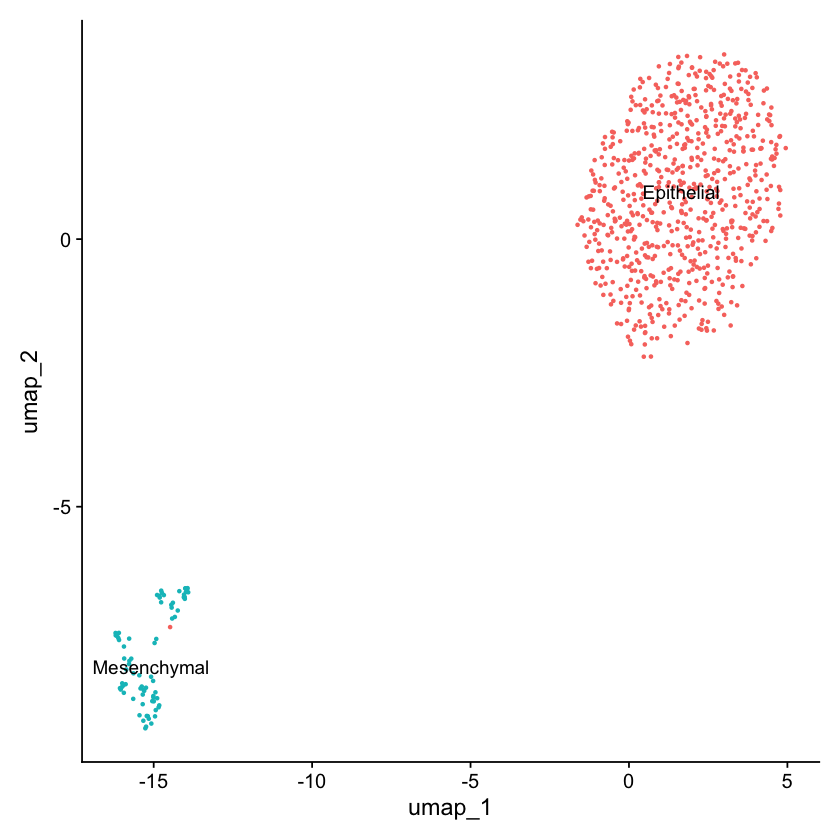

In [56]:
DimPlot(idc, reduction = "umap", label = TRUE, pt.size = 0.5) + NoLegend()